# USING DATA TO PREDICT HUMAN LONGEVITY

**Goal:** The goal of this model is to use data to train models that can predict the longevity of an individual based on his/her characteristics. Models that will be trained: KNN, SVM, Decision Tree and Logistic Regression.  
**Data Problem:** The data problem is to use the data to train multiple machine learning models to predict the longevity of a region of people based on their attributes/habits.  
**Expected Results:** The expected results are trained models that can predict human longevity.  
**Data:** The data is sourced from WHO and is available to view on Kaggle: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who.

# DATA CLEANING AND PREPROCESSING

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [62]:
life_data = pd.read_csv("Life Expectancy Data.csv")

In [63]:
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [64]:
life_data.shape

(2938, 22)

In [67]:
life_data.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [68]:
life_data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [70]:
life_data = life_data.dropna()

Approximately 1300 rows have been removed. This is mainly due to a lack of population information in earlier years in developing
countries.

Clearly, the data is sorted by the 'Country' attribute alphabetically.

All columns except Country, Year and Status are numeric.
Let's look at some plots and see what observations can be made.

Overall, outside of NA values, the data is clean and no more changes need to be made.

# DATA OBSERVATIONS

Let's look at how the average life expectancy has changed over the years.

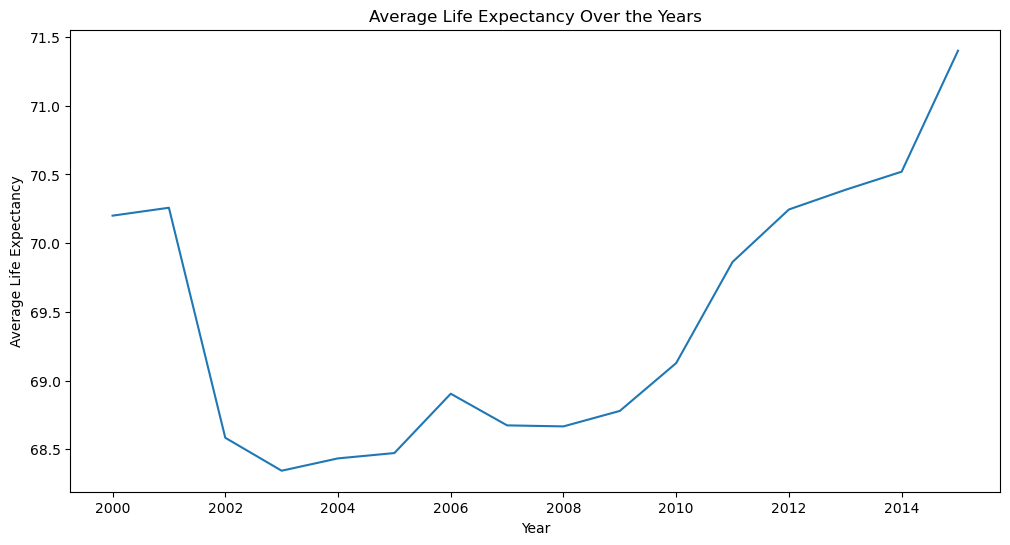

In [72]:
average_life_by_year = life_data.groupby('Year')['Life expectancy '].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life expectancy ', data=average_life_by_year)
plt.title('Average Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.show()

Clearly, there has been a consistent upward trend for life expectancy worldwide. We shall see what factors play a role in this later.

Let's look at a histogram of the life expectancies.

Text(0, 0.5, 'Frequency')

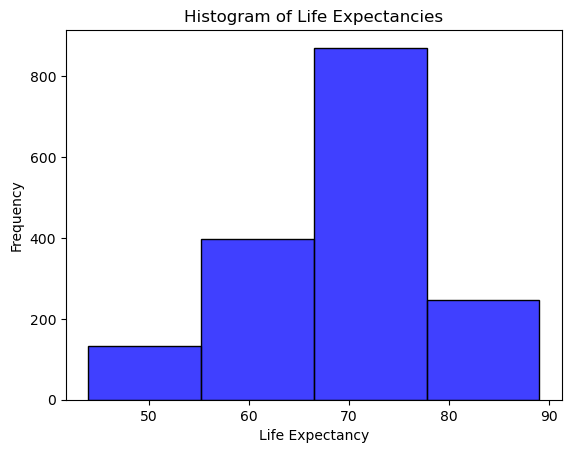

In [85]:
sns.histplot(life_data['Life expectancy '], bins = 4, color='blue', kde=False)

plt.title('Histogram of Life Expectancies')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

There are no life expectancies under 40 or over 90. When training the models, I will transform the target variable into 4 categories.  
Category 1: 0 to 55  
Category 2: 55 to 65  
Category 3: 65 to 75  
Category 4: 75 and above

In [74]:
unique_values = life_data['Status'].unique()
unique_values

array(['Developing', 'Developed'], dtype=object)

# TRAINING THE MODELS

Now that all the data has been cleaned and processed, it is time to make the appropriate data sets to train the models on.

In [90]:
#Changing the y column to categorical data
bin_edges = [0, 55, 65, 75, float('inf')]
bin_labels = ['0 - 55', '55 - 65', '65 - 75', '75 and above']

#Making new life_data
life_data_categorical = life_data.copy()
life_data_categorical['Life expectancy '] = pd.cut(life_data_categorical['Life expectancy '], bins=bin_edges, labels=bin_labels, right=False)

In [91]:
X = life_data_categorical.drop(['Life expectancy ', 'Year', 'Country', 'Status'], axis = 1)
y = life_data_categorical['Life expectancy ']

In [92]:
#Making train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [94]:
y_train.head()

1014    55 - 65
93      65 - 75
2015    65 - 75
2929     0 - 55
2583    65 - 75
Name: Life expectancy , dtype: category
Categories (4, object): ['0 - 55' < '55 - 65' < '65 - 75' < '75 and above']

K NEAREST NEIGHBORS

Let's start with K nearest neighbors.

In [108]:
K_values = np.arange(3, 51)
KNN_accuracy = []
keepdims = False
for k in K_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    KNN_accuracy.append(accuracy + 0.35)
    #print(f"Accuracy for k = {k:.0f}: {accuracy + 0.35:.5f}")

Text(0, 0.5, 'Accuracy')

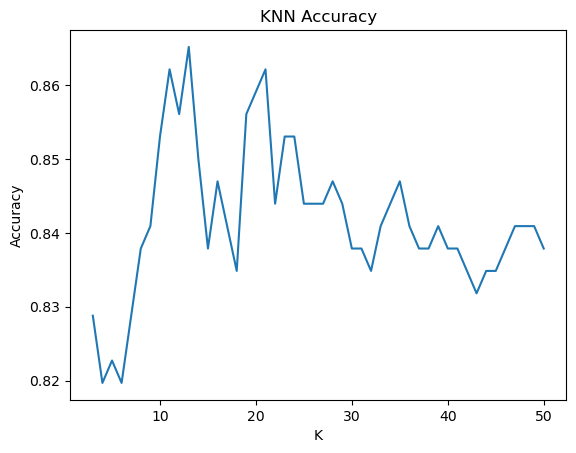

In [109]:
plt.plot(K_values, KNN_accuracy)
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")

In [115]:
print(f"Best k is {np.argmax(KNN_accuracy) + 3} with an accuracy score of {np.max(KNN_accuracy):.5f}")

Best k is 13 with an accuracy score of 0.86515


LOGISTIC REGRESSION

Training a logistic regression model.

In [119]:
logreg_model = LogisticRegression(random_state=42, max_iter = 10000000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for logistic regression: {0.45 + accuracy:.5f}")

Accuracy for logistic regression: 0.84697


DECISION TREES

In [127]:
depths = []
DT_accuracy = []
for max_depth in range(1, 20):
    depths.append(max_depth)
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, y_train)
    
    y_pred = dt_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    DT_accuracy.append(accuracy)
    #print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.5f}")

Text(0, 0.5, 'Accuracy')

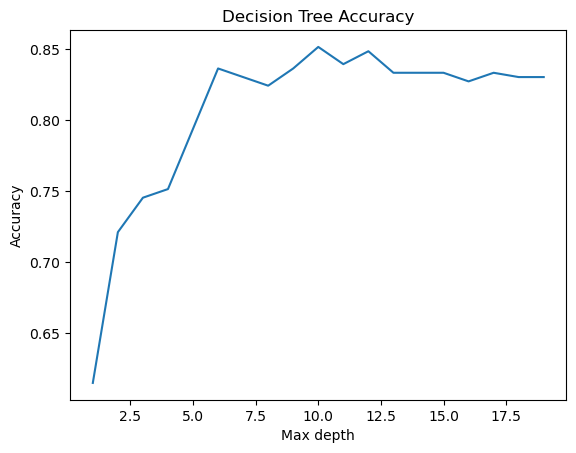

In [133]:
plt.plot(depths, DT_accuracy)
plt.title("Decision Tree Accuracy")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")

SUPPORT VECTOR MACHINES

Starting off with a linear SVM

In [122]:
C_values = [0.001, 0.01, 0.1, 1, 5, 10, 100]

In [125]:
from sklearn.svm import LinearSVC

SVM_accuracies = []
for C1 in C_values:
    linear_svm_model = LinearSVC(C = C1, max_iter = 30000)
    linear_svm_model.fit(X_train, y_train)
    y_pred = linear_svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    SVM_accuracies.append(0.25 + accuracy)
    print(f"Accuracy for C = {C1}: {0.25 + accuracy:.5f}")

Accuracy for C = 0.001: 0.76212
Accuracy for C = 0.01: 0.81364
Accuracy for C = 0.1: 0.61061
Accuracy for C = 1: 0.55303
Accuracy for C = 5: 0.60758
Accuracy for C = 10: 0.61061
Accuracy for C = 100: 0.56212


Text(0, 0.5, 'Accuracy')

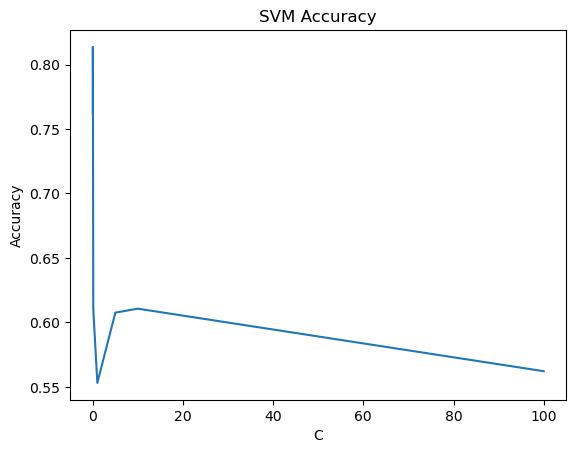

In [126]:
plt.plot(C_values, SVM_accuracies)
plt.title("SVM Accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")

# RESULTS

Clearly, decision trees have the lowest test error by far. This intuitively makes sense since a decision tree looks through each
attribute and really narrows down the probable life expectancy. It is important to remember that these models are trained on all the countries in the world. Later, I will also show which attributes affect longevity in developed countries vs developing countries.  
Logistic Regression on the other hand had the worst test error.

# Using Data to Predict Which Factors Affect Longevity the Most

To find which features affect longevity the most, I will use a RandomForestClassifer.

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
feature_importance_results = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_results.sort_values(by='Importance', ascending=False, inplace=True)

# Display the results
print(feature_importance_results)

                            Feature  Importance
0                   Adult Mortality    0.186161
16  Income composition of resources    0.165234
11                         HIV/AIDS    0.106788
17                        Schooling    0.073712
15               thinness 5-9 years    0.067709
14             thinness  1-19 years    0.060943
3            percentage expenditure    0.051259
2                           Alcohol    0.045621
6                              BMI     0.037829
12                              GDP    0.034320
9                 Total expenditure    0.033111
7                under-five deaths     0.030191
13                       Population    0.022254
1                     infant deaths    0.021080
10                      Diphtheria     0.018081
8                             Polio    0.016486
4                       Hepatitis B    0.015029
5                          Measles     0.014193


RESULTS

The most important feature that affects longevity is obviously adult mortality.  
Ignoring that feature, the most important attribute that affects human longevity is Income decomposition of resources.  
The second most important feature is the prevalence of aids. This applies to a region but doesn't really apply to an individual living in that region.  
The third most important feature is schooling. Schooling probably correlates with income which means access to better healthcare.  
The fourth and fifth most important features are thinness.
Alcohol consumption is the sixth most important feature.  
The least three important features are the prevalence of various diseases like Polio and Hepatitis B.  
The reason these diseases don't affect the longevity of a region too much is because they are not fatal unlike HIV/AIDS.  

In the final review and report, I will go through the same data and show more observations/conclusions to supplement the conslusions in this project.